# Electrical Energy Prediction
### Teodora Petkova, tep18@duke.edu

## Preliminary Analysis
In this project we are aiming to predict the future value of the electrical energy output, hence we need a regression approach instead of a classification one. 

In [48]:
### Python Library Imports
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [37]:
## Data Import
df = pd.read_csv("CCPP_data.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [38]:
# Data Cleaning - Remove Nan and infinity values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [39]:
# Set target variable and remove it from the Dataframe
produced_energy = df['PE']
df = df.drop('PE', axis='columns')

We want to check the correlation of the variables before continuing our further analysis:

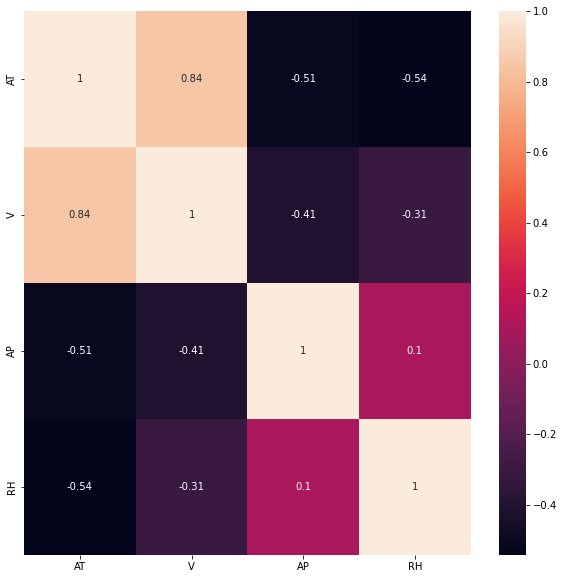

In [40]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sn.heatmap(correlation_matrix, annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'V'}>],
       [<AxesSubplot:title={'center':'AP'}>,
        <AxesSubplot:title={'center':'RH'}>]], dtype=object)

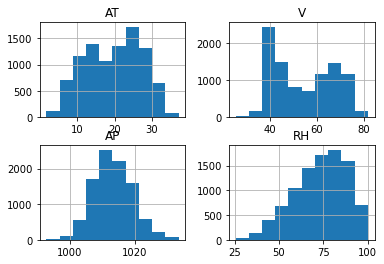

In [41]:
df.hist()

We can observe from the correlation matrix that only the Exhaust Vacuum (V) and Ambient Pressure (AP) variables have a higher correlation between each other. As we can see from the histogram, all of the variables are well distributed over their respective values, and we do not expect to observe many outliers.

I am going to use the $R^2$ metric to measure the performance of my model, since it is scaled from 0 to 1 and is more easily interpeted than MSE or other metrics.

## Feature & Model Selection

Since we have two highly correlated features, we can use only one of them. In this case this would be Ambient Pressure (AT), since it is better distributed over its range. Hence, I will use three features in my prediction model - Temperature (T), Ambient Pressure (AP), Relative Humidity (RH). 

Firstly, I will use a simple linear regression model ran with these three features to predict the target variable. Then, I will compare its performance with this of a random forest.

In [42]:
df = df.drop('V', axis='columns')

## Data Split, Cross Validation
I will use cross-validation on the training set for each of my models, since it helps me make better use of the data. I do not expect to have computational issues, as the data is not that much, hence redoing the model should not be time-expensive.

In [43]:
# Data Split
Xtrain,Xtest,ytrain,ytest = train_test_split(df, produced_energy, test_size = 0.4, random_state=0)

## Model I: Linear Regression


In [50]:
model = LinearRegression()
scores = cross_val_score(model, Xtrain, ytrain, cv=5)
prediction_lr = cross_val_predict(model, Xtrain, ytrain, cv=5)
print(scores.mean())

0.9174044674503221 [428.72942984 482.0865683  456.29497327 ... 460.83896267 468.18545333
 431.39921451]


## Model II

In [46]:
model = RandomForestRegressor(n_estimators=100, max_features='auto', random_state=0)
scores = cross_val_score(model, Xtrain, ytrain, cv=5)
print(scores.mean())

0.9272778987229333


## Final Model Evaluation
The random forest has given me a better $R^2$ score, hence I will use it for the test set.

In [51]:
model.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)
print(r2_score(ytest, yfit))

0.9259421037516655


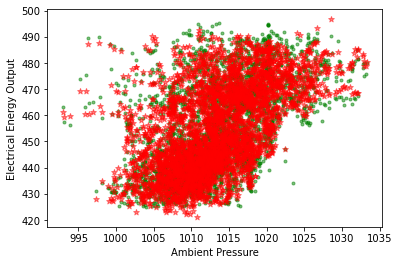

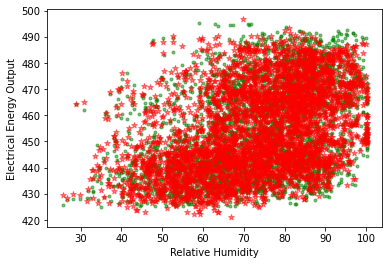

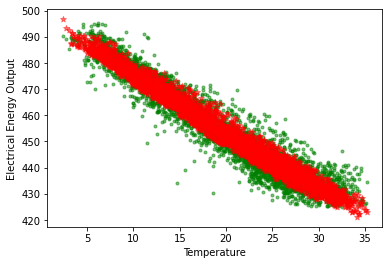

In [57]:
# Visualize predicted vs. real data for each of the features
x_axis = Xtest.AP

plt.scatter(x_axis, ytest, c='g', alpha=0.5, marker='.', label='Real Data')
plt.scatter(x_axis, yfit, c='r', alpha=0.5, marker='*', label='Predicted Data')
plt.xlabel('Ambient Pressure')
plt.ylabel('Electrical Energy Output')
plt.show()

x_axis = Xtest.RH

plt.scatter(x_axis, ytest, c='g', alpha=0.5, marker='.', label='Real Data')
plt.scatter(x_axis, yfit, c='r', alpha=0.5, marker='*', label='Predicted Data')
plt.xlabel('Relative Humidity')
plt.ylabel('Electrical Energy Output')
plt.show()

x_axis = Xtest.AT

plt.scatter(x_axis, ytest, c='g', alpha=0.5, marker='.', label='Real Data')
plt.scatter(x_axis, yfit, c='r', alpha=0.5, marker='*', label='Predicted Data')
plt.xlabel('Temperature')
plt.ylabel('Electrical Energy Output')
plt.show()

## Conclusion
The regression problem of predicting how much electrical energy is produced was solved using the Random Forest model. The metric used was the standardized $R^2$ score, and the training sets were modeled using cross-validation. Since two of the features in the initial dataset were highly correlated, I used only one of them and dropped the other, together with all rows of data with infinity or Nan values.
